# Symbulate Documentation
# Random Variables

<a id='contents'></a>

  1. [**Defining a random variable with RV:**](#RV)
  1. [**Simulating events:**](#sim_events)
  1. [**Plot:**](#plot) Use **.plot()** to display a plot summary of the simulated values of a RV.
  1. [**Distribution of a random variable:**](#distribution)
  1. [**Functions of a random variable:**](#transform)
  1. [**Mean:**](#mean) Use **.mean()** to compute the average of the simulated values of a RV.
  1. [**Variance:**](#var) Use **.var()** to compute the variance of the simulated values of a RV.
  1. [**Standard deviation:**](#var) Use **.sd()** to compute the standard deviation of the simulated values of a RV.
  1. [**Standardize:**](#standardize) Use **.standardize()** to rescale simulated values to have a mean of 0 and a standard deviation of 1.

< [Simulation tools](sim.html) | [Contents](index.html) | [Cards, coins, and dice](common_cards_coins_dice.html) >

Instructions for downloading and installing Symbulate can be found [here](http://calpoly.edu/~dsun09/python.html).  During a session, be sure to import Symbulate using the following commands.
<a id='rv'></a>

In [2]:
from symbulate import *
%matplotlib inline

## Random variables

A random variable is a function that takes as an input an outcome of a probability space and returns a real number.  Commonly encountered random variables are either discrete or continuous.
  * A **discrete** random variable can take at most countably many distinct values.
  * A **continuous** random variable can take any value in some interval of real numbers.

Values of a random variable can be simulated and analyzed much like the outcomes of a probability space.  However, several additional tools are available for RV.

<a id='RV'></a>

### Defining a random variable with RV

Use the RV class to define random variables on a probability space.  A random variable is a function which maps the outcomes of a probability space to a real number; therefore a probability space must be defined first.

*Example.* Consider the random variable $X$ representing the number of Heads in 5 flips of a fair coin.  With 1 representing Heads and 0 Tails, we can count the number of Heads by summing the 0/1 values.  We define a probability space corresponding to 5 flips of a fair coin, and then a RV on that space which takes an outcome and sums its values.

In [4]:
P = BoxModel([0,1], size = 5)
X = RV(P, sum)

A random variable can be called as a function to return its value for a particular outcome in the probability space.

In [5]:
P = BoxModel([0,1], size = 5)
X = RV(P, sum)
outcome = (0, 1, 0, 1, 1)
X(outcome)

3

If no function is specified in `RV`, the default is the identity function, `f(x) = x`.

In [6]:
P = Normal(0,1)
X = RV(P)
X(-0.5)

-0.5

Like the probability space defintions, the RV command only defines a random variable.  [Simulation tools](sim.html) like `.sim()`, `.tabulate()`, `.filter()`, and `.count()`  work for `RV` just like for `ProbabilitySpace`.

In [5]:
P = BoxModel([0,1], size = 5)
X = RV(P, sum)
values = X.sim(10000)
values

0,0
1,1
2,2
3,3
4,1
5,2
6,2
7,2
8,1
...,...
9999,2


In [6]:
values.tabulate(normalize = True)

0,0.0322
1,0.158
2,0.3113
3,0.3135
4,0.1551
5,0.0299
Total,1.0


In [7]:
values.count_gt(3) / 10000

0.185

Random variables can also be specified by user defined functions.

*Example.* Ten cards labeled 1, 2, $\ldots$ , 10 are shuffled and dealt one at a time. Let $X$ be the number of the cards (out of ten) for which the number on the card matches its position in the deal. (For example, a match occurs if card 3 is the third card dealt.)

In [ ]:
n = 10
labels = list(range(n))
# remember, Python starts the index at 0, so the cards are labebeled 0, ..., 9

def number_matches(x):
    count = 0
    for i in range(n):
        if x[i] == labels[i]:
            count += 1
    return count


P = BoxModel(labels, size = n, replace = False)
X = RV(P, number_matches)
X.sim(10000)

<a id='RVevent
'></a>

### Simulating events

An *event* is a set of outcomes in the probability space.  For example, if the random variable $X$ represents the number of Heads in 5 flips of a fair coin, then the event $\{X>3\}$ is the collection of Heads/Tails sequences with more than 3 Heads.  In Symbulate events must be enclosed in parentheses, e.g. `(X > 3)`.  Events like `(X > 3)` can be simulated; calling `.sim()` on an event returns `True` for outcomes where the event occurs and `False` otherwise. Simulating events provides another method for estimating probabilities.

*Example.* If $X$ represents the number of Heads in 5 flips of a fair coin, the following is one method for estimating $P(X > 3)$, the probability of more than 3 Heads in 5 flips of a fair coin.  (The true probability is 0.1875.)

In [7]:
P = BoxModel([0,1], size = 5)
X = RV(P, sum)
(X > 3).sim(10000).tabulate()

False,8140
True,1860
Total,10000


<a id='plot'></a>

### Plot

Tabulate provides a tabular summary of the simulated values of a RV.  A plot summary can be obtained with `.plot()`.  The type of plot returned depends on the type of the random variable, discrete or continuous.

For *discrete* random variables, `.plot()` generally returns frequencies (by default) or an "impulse" (or "spike") plot of the relative frequencies (with `normalize = True`) for each of the possible values.

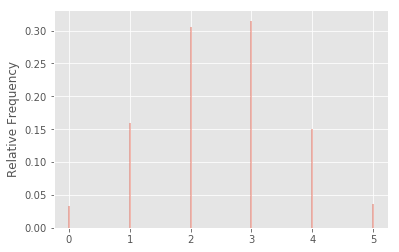

In [10]:
P = BoxModel([0,1], size = 5)
X = RV(P, sum)
X.sim(10000).plot()

Symbulate allows a plot to be defined using either `x.plot()` or `plot(x)`.

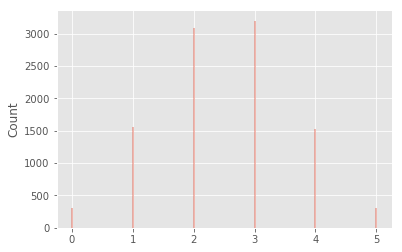

In [11]:
P = BoxModel([0,1], size = 5)
X = RV(P, sum)
plot(X.sim(10000), normalize = False)

For *continuous* random variables, `.plot()` returns a histogram, which provides the frequencies of simulated values falling in interval "bins".  By default, normalize = False and the vertical axis of the histogram is on the *density* scale, so that *areas* of the bars correspond to relative frequencies.  

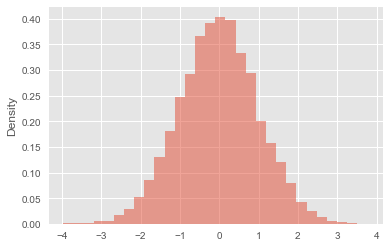

In [10]:
P = Normal(0,1)
X = RV(P)
X.sim(10000).plot()

The number of bins can be set manually with `bins=`.

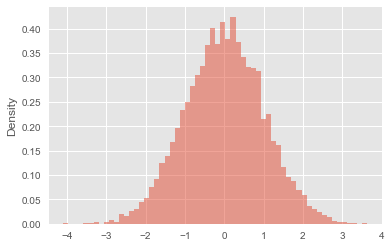

In [11]:
X.sim(10000).plot(bins = 60)

If many of the simulated values have small frequencies `.plot()` will return a histogram for both discrete and continuous random variables.

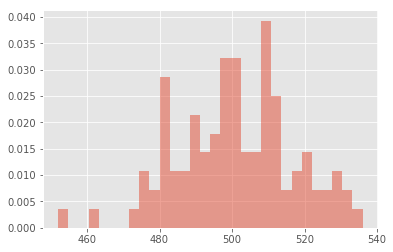

In [14]:
P = BoxModel([0,1], size = 1000)
X = RV(P, sum)
X.sim(100).plot()

The type of plot, impulse versus histogram, can be overriden with the `type =` option, which can be set to either `type = 'impulse'` or `type = 'bar'` (the latter type for histograms).

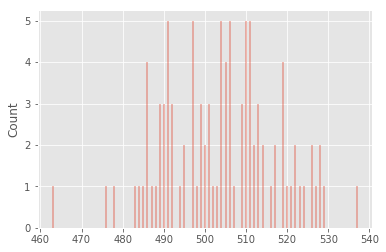

In [15]:
P = BoxModel([0,1], size = 1000)
X = RV(P, sum)
X.sim(100).plot(type = 'impulse', normalize = False)

It is not recommended to use `type = 'impulse'` for continuous random variables.

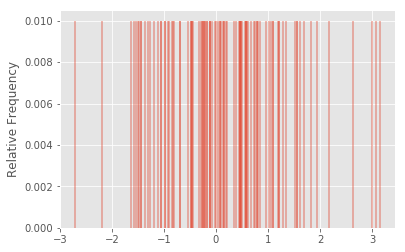

In [16]:
P = Normal(0,1)
X = RV(P)
X.sim(100).plot(type = 'impulse')

Several distributions can be overlaid on the same plot.  The parameter `alpha`, which can take a value between 0 and 1, controls the level of transparency.

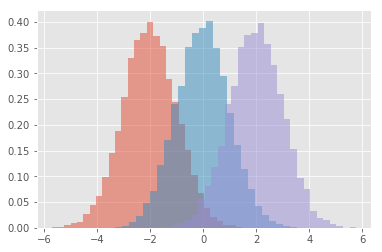

In [17]:
for mu in [-2, 0, 2]:
    RV(Normal(mean = mu, sd = 1)).sim(10000).plot(alpha = 0.5)

When overlaying several discrete distributions in a plot, it is recommended to use the `jitter = True` option so that the bars do not coincide.

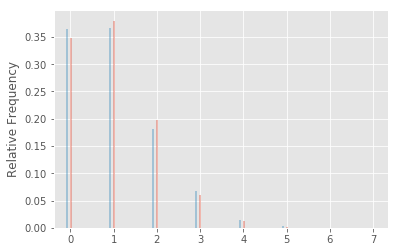

In [18]:
RV(Binomial(10, 0.1)).sim(10000).plot(jitter = True)
RV(Poisson(1)).sim(10000).plot(jitter = True)

<a id='distribution'></a>

### Distribution of a random variable

Tabulate and plot provide summaries of the *distribution* of a random variable.  A distribution is a probability model on the real line which describes the possible values that the random variable can take and their relative likelihoods.   The distribution of a random variable is determined by (1) the underlying probability space on which the random variable is defined and (2) the function (mapping the probability space outcomes to real numbers) that defines the random variable.

It also common to specify the distribution of a random variable directly.  For example, a problem may  state "let $X$ have a Binomial(5, 0.5) distribution" without mention of the underlying probabilty space or random variable.  `RV` can also be used to define a random variable by specifying its distribution.  (Many [common probability distributions](common_discrete.html) are built into Symbulate.)

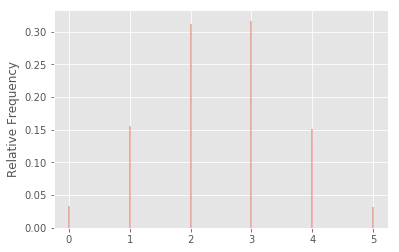

In [19]:
X = RV(Binomial(n = 5, p = 0.5))
X.sim(10000).plot()

Note that specifying a random variable by specifying its distribution in this way has the effect of defining the probability space to be the distribution of the random variable and the function defined on this space to be the identity.  However, it is more appropriate to think of defining a random variable with the given distribution on an *unspecified probability space* through an *unspecified function*.

Random variables can involve different probability spaces and apply different functions to outcomes and have the same distribution. For example, two random variables measuring different underlying observational units can have the same distribution. Consider $X$ to be the number of Heads and $Y$ to be the number of tails in five coin flips, which both have a `Binomial(n=5, p=0.5)` distribution.

In [20]:
P = BoxModel([1, 0], size = 5)
X = RV(P, sum)
Y = 5 - X

outcome = (1, 0, 0, 1, 1)

X(outcome)

3

In [21]:
Y(outcome)

2

In fact, $X$ and $Y$ are not equal for any outcome so $P(X = Y) = 0$.

In [22]:
(X == Y).sim(10000).tabulate()

False,10000
Total,10000


However over many outcomes $X$ and $Y$ have the same distribution.

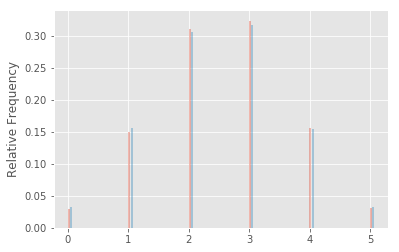

In [23]:
X.sim(10000).plot(jitter = True)
Y.sim(10000).plot(jitter = True)

This example illustrates that knowledge that a random variable has a specific distribution (e.g. `Binomial(5, 0.5)`) does not necessarily convey any information about the underlying observational units or variable being measured. Since both $X$ and $Y$ have the same distribution while measuring different variables, a specification like `X = RV(Binomial(5, 0.5))` defines a random variable X on an unspecified probability space via an unspecified function.

<a id='transform'></a>

### Functions of a random variable

Functions of random variables are also random variables.  If X is an RV, define a new RV $Y=g(X)$ using `X.apply(g)`.  The resulting $Y$ behaves like any other RV.

Note that for many math functions such as `exp` and `log` and `sin`, you can simply call `g(X)` rather than `X.apply(g)`.

*Example.* If $X$ has a normal distribution, then $e^X$ has a *lognormal* distribution.

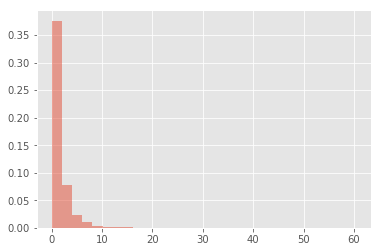

In [24]:
X = RV(Normal(mean = 0, var = 1))
Y = exp(X) # same as X.apply(exp)
Y.sim(10000).plot()

*Example.* If $U$ has a Uniform(0,1) distribution then $-\log(1-U)$ has an Exponential(1) distribution.

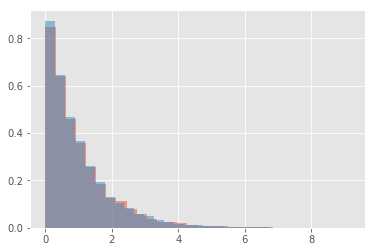

In [25]:
U = RV(Uniform(0,1))
X = -log(1-U)
X.sim(10000).plot(alpha = 0.5)
RV(Exponential(1)).sim(10000).plot(alpha = 0.5)

*Example.* A user defined function with `.apply()`

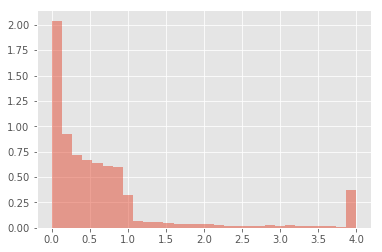

In [26]:
def g(x):
    return min(abs(x - 1), 2)**2

X = RV(Exponential(rate = 1))
Y = X.apply(g)
Y.sim(10000).plot()

<a id='mean'></a>

### Mean

The expected value of a random variable, $E(X)$, is its probability-weighted average value. 

The expected value of a discrete random variable $X$ with probability mass function $p_X(x) = P(X=x)$ is
$$
E(X) = \sum_{x} x \, p_X(x)
$$
The expected value $E(X)$ of a continuous random variable $X$ with probability density function $f_X$ is
$$
E(X) = \int\limits_{-\infty}\limits^{+\infty} x \, f_{X}(x)dx
$$
An expected value can be approximated by simulating many values of the random variable and finding their sample mean (i.e. average) using `.mean()`.

*Example*.  If $X$ has a geometric distribution with $p = 0.1$ its expected value is $1/0.1 = 10$.

In [27]:
RV(Geometric(p = 0.1)).sim(10000).mean()

10.1074

If x denotes simulated values, then either `x.mean()` or `mean(x)` will return the mean of the values.

In [28]:
x = RV(Geometric(p = 0.1)).sim(10000)
mean(x)

10.0317

Recall that output can be formatted using [print statements](index.html#displayoutput).

In [29]:
print('An estimate of E(X) is: {:.2f}'.format(mean(x)))

An estimate of E(X) is: 10.03


<a id='var'></a>

### Variance

The variance of a random variable is the probability-weighted average of the squared deviation from the expected value: $E[|X-E(X)|^2]$.  Similar to expected value, variance can be approximated by simulating many values of the random variable and finding their sample variance, using `.var()`.  (As with mean, both `x.var()` or `var(x)` are allowed.)

*Example.* If $X$ has an exponential distribution with rate parameter $\lambda=1/4$ its variance is 16.

In [30]:
X = RV(Exponential(rate = 1/4))
x = X.sim(10000)
x.var()

16.171623637699561

Using `.var()` is equivalent to the following.

In [31]:
mean((x-x.mean())**2)

16.171623637699533

**Standard deviation**, `.sd()`, is the square root of the variance.  (As with mean, both `x.sd()` or `sd(x)` are allowed.)

In [32]:
x.sd()

4.0213957325410741

In [33]:
sqrt(x.var())

4.021395732541074

<a id='standardize'></a>
### Standardize

A *standardized variable* is a variable that has been rescaled to have a mean of zero and a standard deviation of one.  Standardization is achieved by subtracting the mean from each value and then dividing by the standard deviation.  In Symbulate, the `.standardize()` method standardizes the simulated values of a random variable.

In [13]:
X = RV(Normal(mean=3, sd=2))
x = X.sim(10000)
x.mean(), x.sd()

(3.0283392236263658, 1.9680564262339768)

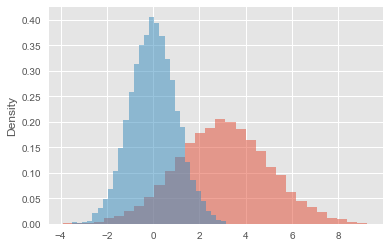

In [14]:
z = x.standardize()
x.plot()
z.plot()

In [15]:
z.mean(), z.sd()

(1.2310152897043736e-16, 0.99999999999999989)

< [Simulation tools](sim.html) | [Contents](index.html) | [Cards, coins, and dice](common_cards_coins_dice.html) >